# Handling Missing Data

In this section, we will study ways to identify and treat missing data. We will:
- Identify missing data in dataframes
- Treat (delete or impute) missing values

There are various reasons for missing data, such as, human-errors during data-entry, non availability at the end of the user (e.g. DOB of certain people), etc. Most often, the reasons are simply unknown.

In python, missing data is represented using either of the two objects ```NaN``` (Not a Number) or ```NULL```. We'll not get into the differences between them and how Python stores them internally etc. We'll focus on studying ways to identify and treat missing values in Pandas dataframes.

There are four main methods to identify and treat missing data:
- ```isnull()```: Indicates presence of missing values, returns a boolean
- ```notnull()```: Opposite of ```isnull()```, returns a boolean
- ```dropna()```: Drops the missing values from a data frame and returns the rest
- ```fillna()```: Fills (or imputes) the missing values by a specified value


For this exercise, we will use the **Melbourne house pricing dataset**. 


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("melbourne.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


The first few rows contain missing values, represented as NaN.

Let's quickly look at the structure of the data frame, types of columns, etc.

In [2]:
# approx 23k rows, 21 columns
print(df.shape)
print(df.info())

(23547, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Address        23547 non-null  object 
 2   Rooms          23547 non-null  int64  
 3   Type           23547 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         23547 non-null  object 
 6   SellerG        23547 non-null  object 
 7   Date           23547 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       19066 non-null  float64
 11  Bathroom       19063 non-null  float64
 12  Car            18921 non-null  float64
 13  Landsize       17410 non-null  float64
 14  BuildingArea   10018 non-null  float64
 15  YearBuilt      11540 non-null  float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      19243 non-null  float64

In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,23547.000000,1.839600e+04,23546.000000,23546.000000,19066.000000,19063.000000,18921.000000,17410.000000,10018.000000,11540.000000,19243.000000,19243.000000,23546.000000
mean,2.976048,1.056697e+06,10.306515,3109.782893,2.951956,1.570897,1.626235,551.783458,154.527895,1964.636742,-37.812434,145.000287,7517.480591
std,0.974501,6.419217e+05,6.016318,94.522190,0.996032,0.712684,0.974048,3544.288014,462.535765,37.595504,0.079926,0.106071,4414.995634
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.184180,144.431620,129.000000
25%,2.000000,6.330000e+05,6.200000,3047.000000,2.000000,1.000000,1.000000,181.000000,95.000000,1940.000000,-37.859300,144.939300,4385.000000
50%,3.000000,8.800000e+05,9.500000,3101.000000,3.000000,1.000000,2.000000,448.000000,129.000000,1970.000000,-37.809700,145.004300,6567.000000
75%,4.000000,1.302000e+06,13.000000,3150.000000,4.000000,2.000000,2.000000,656.000000,180.000000,2000.000000,-37.759800,145.063100,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.407580,145.526350,21650.000000


## Identifying Missing Values

The methods ```isnull()``` and ```notnull()``` are the most common ways of identifying missing values. 

While handling missing data, you first need to identify the rows and columns containing missing values, count the number of missing values, and then decide how you want to treat them.

It is important that **you treat missing values in each column separately**, rather than implementing a single solution (e.g. replacing NaNs by the mean of a column) for all columns.

```isnull()``` returns a boolean (True/False) which can then be used to find the rows or columns containing missing values.

In [11]:
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
23543,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
23544,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
23545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [5]:
# isnull()
df.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
23543,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
23544,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,False
23545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


###  Identifying Missing Values in Columns
Let's first compute the total number of missing values in the data frame. You can calculate the number of missing values in each column by ```df.isnull().sum()``` 

In [12]:
# summing up the missing values (column-wise)
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

Note that some columns have extremely **large number of missing values**, such as Price, Bedroom2, Bathroom, BuildingArea, YearBuilt etc. In such cases, one should be careful in handling missing values, since if you replace them by arbitrary numbers such as mean, median etc., the entire further analysis may throw unrealistic or unexpected results.

The functions ```any()``` and ```all()``` are quite useful to identify rows and columns having missing values:
- ```any()``` returns ```True``` when at least one value satisfies a condition (equivalent to logical ```or```)
- ```all()``` returns ```True``` when all the values satisfy a condition (equivalent to logical ```and```)

In [6]:
# columns having at least one missing value
df.isnull().any()

# above is equivalent to axis=0 (by default, any() operates on columns)
df.isnull().any(axis=0)

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [7]:
df.any()

Suburb           True
Address          True
Rooms            True
Type             True
Price            True
Method           True
SellerG          True
Date             True
Distance         True
Postcode         True
Bedroom2         True
Bathroom         True
Car              True
Landsize         True
BuildingArea     True
YearBuilt        True
CouncilArea      True
Lattitude        True
Longtitude       True
Regionname       True
Propertycount    True
dtype: bool

We have identified columns having missing values and have computed the number of missing values in each. Let's do the same for rows.

### Identifying  Missing Values in Rows

The methods ```any()``` and ```all()``` can be used to identify rows having **at least one** and **all** missing values respectively. To specify that the operation should be done on rows, you need to use ```axis=1``` as an argument.

In [31]:
# rows having at least one missing value
df.isnull().any(axis=1)

0         True
1         True
2        False
3         True
4        False
         ...  
23542     True
23543     True
23544     True
23545     True
23546     True
Length: 23547, dtype: bool

In [8]:
# rows having all missing values
df.isnull().all(axis=1) 

0        False
1        False
2        False
3        False
4        False
         ...  
23542    False
23543    False
23544    False
23545    False
23546    False
Length: 23547, dtype: bool

In [10]:
# sum it up to check how many rows have all missing values
df.isnull().all(axis=1).sum()

0

In [11]:
# columns having all missing values
df.isnull().all(axis=0).sum()

0

Thus, there are no rows having all missing values (we'd remove them if there were any). 

Often, you may also want to remove the rows having more than a certain threshold number of missing values. To do that, you need to count the number of missing values in each row using ```sum()```.

In [23]:
# sum of missing values in each row
df.isnull().sum(axis=1).sort_values(ascending=False)

18523    13
12930    10
12842    10
12927    10
12900    10
         ..
3309      0
18466     0
18465     0
3310      0
15353     0
Length: 23547, dtype: int64

In [24]:
# sum of missing values in each column
df.isnull().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

We have now identified:
- The number of missing values in columns
- The number of missing values in rows

Let's now move ahead and treat the missing values.

### Treating Missing Values

There are broadly two ways to treat missing values:
1. Delete: Delete the missing values 
2. Impute: 
    - Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc. 
    - Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values
   

In general, imputation makes assumptions about the missing values and replaces missing values by arbitrary numbers such as mean, median etc. It should be used only when you are reasonably confident about the assumptions.

Otherwise, deletion is often safer and recommended. You may lose some data, but will not make any unreasonable assumptions.

**Caution**: Always have a backup of the original data if you're deleting missing values.  

<hr>
**Additional Stuff for Nerds**

How you treat missing values should ideally depend upon an understnading of why missing values occur. The reasons are classified into categories such as *missing completely at random, missing at random, misisngness that depends on the missing value itself etc.* 
 
 
We'll not discuss *why missing values occur*, though you can read this article if interested: http://www.stat.columbia.edu/~gelman/arm/missing.pdf
<hr>

### Treating Missing Values in Columns

Let's now treat missing values in columns. Let's look at the number of NaNs in each column again, this time as the *percentage of missing values in each column*. Notice that we calculate the number of rows as ```len(df.index)```.

In [35]:
len(df.index)

23547

In [36]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [37]:
no_of_rows=df.shape[0]
no_of_rows

23547

In [38]:
count_of_missing_values_columnwise = df.isnull().sum()
count_of_missing_values_columnwise

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [39]:
# calcualte mssing values in percentage columnwise
missing_values_in_percentage = round((count_of_missing_values_columnwise/no_of_rows)*100, 2)
missing_values_in_percentage.sort_values(ascending=False)

BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Landsize         26.06
Price            21.88
Car              19.65
Bathroom         19.04
Bedroom2         19.03
Longtitude       18.28
Lattitude        18.28
Regionname        0.00
Suburb            0.00
Address           0.00
Postcode          0.00
Distance          0.00
Date              0.00
SellerG           0.00
Method            0.00
Type              0.00
Rooms             0.00
Propertycount     0.00
dtype: float64

In [40]:
# summing up the missing values (column-wise) to display in %
round(100*(df.isnull().sum()/len(df.index)), 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64

Notice that there are columns having almost 22%, 19%, 26%, 57% etc. missing values. When dealing with columns, you have two simple choices - either **delete or retain the column.** If you retain the column, you'll have to treat (i.e. delete or impute) the rows having missing values.

If you delete the missing rows, you lose data. If you impute, you introduce bias.

Apart from the number of missing values, the decision to delete or retain a variable depends on various other factors, such as:
- the analysis task at hand
- the usefulness of the variable (based on your understanding of the problem)
- the total size of available data (if you have enough, you can afford to throw away some of it)
- etc.

For e.g. let's say that we want to build a (linear regression) model to predict the house prices in Melbourne. Now, even though the variable ```Price``` has about 22% missing values, you cannot drop the variable, since that is what you want to predict. 

Similarly, you would expect some other variables such as ```Bedroom2```, ```Bathroom```, ```Landsize``` etc. to be important predictors of ```Price```, and thus cannot remove those columns.

There are others such as ```BuildingArea```, which although seem important, have more than 50% missing values. It is impossible to either delete or impute the rows corresponding to such large number of missing values without losing a lot of data or introducing heavy bias. 



Thus, for this exercise, let's remove the columns having more than 30% missing values, i.e. ```BuildingArea```, ```YearBuilt```, ```CouncilArea```.



In [42]:
# removing the three columns
df = df.drop('BuildingArea', axis=1)
df = df.drop('YearBuilt', axis=1)
df = df.drop('CouncilArea', axis=1)

KeyError: "['BuildingArea'] not found in axis"

In [43]:
(100* df.isnull().sum()/len(df.index)).sort_values(ascending=False)

Landsize         26.062768
Price            21.875398
Car              19.645815
Bathroom         19.042766
Bedroom2         19.030025
Longtitude       18.278337
Lattitude        18.278337
Postcode          0.004247
Regionname        0.004247
Propertycount     0.004247
Distance          0.004247
Address           0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Type              0.000000
Rooms             0.000000
Suburb            0.000000
dtype: float64

We now have columns having maximum 26% missing values (```Landsize```). Next, we need to treat the rows.

### Treating Missing Values in Rows

Now, we need to either delete or impute the missing values. First, let's see if there are any rows having a significant number of missing values. If so, we can drop those rows, and then take a decision to delete or impute the rest.

After dropping three columns, we now have 18 columns to work with. Just to inspect rows with missing values, let's have a look at the rows having more than 5 missing values.

In [44]:
#count of missing values in each row
df[df.isnull().sum(axis=1) > 5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10-12-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10-12-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,Templestowe Lower,1/207 Manningham Rd,2,u,550000.0,PI,Barry,26-08-2017,12.4,3107.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,5420.0
23499,Thornbury,1/128 Dundas St,2,t,770000.0,PI,McGrath,26-08-2017,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
23502,Thornbury,111 Pender St,2,t,858000.0,S,Jellis,26-08-2017,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
23508,Toorak,21/1059 Malvern Rd,2,u,720000.0,VB,Beller,26-08-2017,4.1,3142.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7217.0


In [71]:
df[df.isnull().sum(axis=1) > 6]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
34,Abbotsford,16b Mollison St,2,h,NaN,PI,Biggin,16-07-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
60,Abbotsford,4/328 Johnston St,2,u,NaN,PI,Biggin,28-05-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
121,Airport West,2/89 Marshall Rd,3,u,NaN,VB,Barry,25-02-2017,13.5,3042.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,3464.0
207,Alphington,4/5 Chandler Hwy,4,t,NaN,PN,Nelson,13-08-2016,6.4,3078.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,2211.0
211,Alphington,11 Tower Av,4,h,NaN,S,Jellis,16-04-2016,6.4,3078.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,2211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23292,Melbourne,505/1 Roy St,2,u,NaN,S,Kay,26-08-2017,0.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,17496.0
23333,Mount Waverley,19 Larch Cr,3,h,NaN,SN,Harcourts,26-08-2017,14.2,3149.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,13366.0
23363,Ormond,9a Bewdley St,4,t,NaN,S,Jellis,26-08-2017,11.4,3204.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3578.0
23398,Reservoir,13 Lawley St,4,h,NaN,PI,Barry,26-08-2017,12.0,3073.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,21650.0


Notice an interesting pattern - many rows have multiple columns missing. Since each row represents a house, it indicates that there are houses (observations) whose majority data has either not been collected or is unavailable. Such observations are anyway unlikely to contribute to prediction of prices. 

Thus we can remove the rows with (say) more than 5 missing values.

In [45]:
# count the number of rows having > 5 missing values
# use len(df.index)
len(df[df.isnull().sum(axis=1) > 5].index)

4278

In [46]:
# 4278 rows have more than 5 missing values
# calculate the percentage
100*(len(df[df.isnull().sum(axis=1) > 5].index) / len(df.index))

18.16791948018856

Thus, about 18% rows have more than 5 missing values. Let's remove these rows and count the number of missing values remaining.

In [47]:
# retaining the rows having <= 5 NaNs
df = df[df.isnull().sum(axis=1) <= 5]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.71
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          1.05
Bathroom          1.07
Car               1.81
Landsize          9.65
Lattitude         0.13
Longtitude        0.13
Regionname        0.00
Propertycount     0.00
dtype: float64

Notice that now, we have removed most of the rows where multiple columns (```Bedroom2```, ```Bathroom```, ```Landsize```) were missing. 

Now, we still have about 21% missing values in the column ```Price``` and 9% in ```Landsize```. Since ```Price``` still contains a lot of missing data (and imputing 21% values of a variable you want to predict will introduce heavy bias), its a bad idea to impute those values. 

Thus, let's remove the missing rows in ```Price``` as well. Notice that you can use ```np.isnan(df['column'])``` to filter out the corresonding rows, and use a ```~``` to discard the values satisfying the condition.

In [48]:
df[~np.isnan(df['Price'])]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04-06-2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26-08-2017,6.8,3016.0,2.0,2.0,1.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26-08-2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,4.0,3.0,2.0,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,-37.81188,144.88449,Western Metropolitan,6543.0


In [50]:
# removing NaN Price rows
df = df[~np.isnan(df['Price'])]

round(100*(df.isnull().sum()/len(df.index)), 2)


Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         1.05
Bathroom         1.07
Car              1.76
Landsize         9.83
Lattitude        0.15
Longtitude       0.15
Regionname       0.00
Propertycount    0.00
dtype: float64

Now, you have ```Landsize``` as the only variable having a significant number of missing values. Let's give this variable a chance and consider imputing the NaNs. 

The decision (whether and how to impute) will depend upon the distribution of the variable. For e.g., if the variable is such that all the observations lie in a short range (say between 800 sq. ft to 820 sq.ft), you can take a call to impute the missing values by something like the mean or median ```Landsize```. 

Let's look at the distribution.

In [51]:
df['Landsize'].describe()

count     13603.000000
mean        558.116371
std        3987.326586
min           0.000000
25%         176.500000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df['Landsize'].median()

440.0

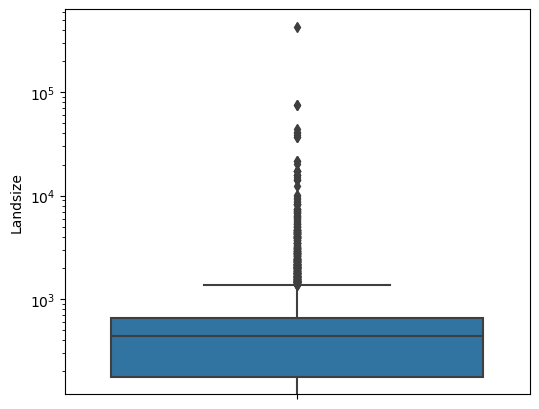

In [62]:
plt.figure(figsize=(6, 5))
sns.boxplot(y='Landsize', data=df)
plt.yscale('log')
plt.show()

Notice that the minimum is 0, max is 433014, the mean is 558 and median (50%) is 440. There's a significant variation in the 25th and the 75th percentile as well (176 to 651). 

Thus, imputing this with mean/median seems quite biased, and so we should remove the NaNs.

In [63]:
~df.Landsize.isnull()

1         True
2         True
4         True
5         True
6         True
         ...  
23540    False
23541     True
23544    False
23545     True
23546    False
Name: Landsize, Length: 15086, dtype: bool

In [64]:
df[df['Landsize'].notnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04-06-2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26-08-2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
23538,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26-08-2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
23539,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26-08-2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26-08-2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [65]:
# removing NaNs in Landsize
df = df[~np.isnan(df['Landsize'])]

df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04-06-2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26-08-2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
23538,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26-08-2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
23539,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26-08-2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26-08-2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [66]:
print(df.shape)

(13603, 18)


In [67]:
len(df.index)

13603

In [68]:
#again check if there is any missing value
df.isnull().sum().sort_values()

Suburb            0
Landsize          0
Bedroom2          0
Postcode          0
Regionname        0
Date              0
Distance          0
Method            0
Price             0
Type              0
Rooms             0
Address           0
SellerG           0
Propertycount     0
Bathroom          1
Lattitude        22
Longtitude       22
Car              63
dtype: int64

We have reduced the NaNs significantly now. Only the variables ```Bathroom```, ```Car```, ```Lattitude``` and ```Longitude``` have a small number of missing values (most likely, the same rows will have ```Lattitude``` and ```Longitude``` missing).

Let's first look at ```Lattitude``` and ```Longitude```.

In [119]:
df[df['Lattitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
2572,Burwood,23 Monica St,3,h,990000.0,VB,Fletchers,17-09-2016,11.7,3125.0,3.0,2.0,2.0,263.0,NaN,NaN,Southern Metropolitan,5678.0
3257,Clifton Hill,3/268 Alexandra Pde E,1,u,363000.0,S,hockingstuart,27-06-2016,3.4,3068.0,1.0,1.0,1.0,0.0,NaN,NaN,Northern Metropolitan,2954.0
4485,Footscray,483 Barkly St,3,t,781000.0,S,Jas,27-11-2016,6.4,3011.0,3.0,2.0,2.0,98.0,NaN,NaN,Western Metropolitan,7570.0
5170,Hampton East,7 Seafoam St,4,t,1185000.0,S,RT,28-05-2016,14.5,3188.0,4.0,3.0,1.0,300.0,NaN,NaN,Southern Metropolitan,2356.0
10745,Williamstown North,4/9 Adeline St,1,u,355000.0,S,Sweeney,27-11-2016,8.9,3016.0,1.0,1.0,1.0,46.0,NaN,NaN,Western Metropolitan,802.0
13223,Melbourne,1913/228 Abeckett St,3,u,1175000.0,PI,Icon,29-04-2017,2.8,3000.0,3.0,3.0,2.0,0.0,NaN,NaN,Northern Metropolitan,17496.0
14008,Brooklyn,9 Richards Ct,3,h,750000.0,S,hockingstuart,20-05-2017,10.9,3012.0,3.0,1.0,2.0,667.0,NaN,NaN,Western Metropolitan,962.0
14132,North Melbourne,13/201 Abbotsford St,2,t,755000.0,PI,Nelson,29-04-2017,2.3,3051.0,2.0,1.0,1.0,1537.0,NaN,NaN,Northern Metropolitan,6821.0
14139,Oakleigh South,4 Druitt St,4,h,1205500.0,S,Woodards,22-04-2017,14.7,3167.0,4.0,2.0,2.0,553.0,NaN,NaN,South-Eastern Metropolitan,3692.0
14142,Oakleigh South,298 Warrigal Rd,3,h,799999.0,S,Woodards,29-04-2017,14.7,3167.0,3.0,2.0,4.0,590.0,NaN,NaN,South-Eastern Metropolitan,3692.0


In [120]:
df[df['Longtitude'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
2572,Burwood,23 Monica St,3,h,990000.0,VB,Fletchers,17-09-2016,11.7,3125.0,3.0,2.0,2.0,263.0,NaN,NaN,Southern Metropolitan,5678.0
3257,Clifton Hill,3/268 Alexandra Pde E,1,u,363000.0,S,hockingstuart,27-06-2016,3.4,3068.0,1.0,1.0,1.0,0.0,NaN,NaN,Northern Metropolitan,2954.0
4485,Footscray,483 Barkly St,3,t,781000.0,S,Jas,27-11-2016,6.4,3011.0,3.0,2.0,2.0,98.0,NaN,NaN,Western Metropolitan,7570.0
5170,Hampton East,7 Seafoam St,4,t,1185000.0,S,RT,28-05-2016,14.5,3188.0,4.0,3.0,1.0,300.0,NaN,NaN,Southern Metropolitan,2356.0
10745,Williamstown North,4/9 Adeline St,1,u,355000.0,S,Sweeney,27-11-2016,8.9,3016.0,1.0,1.0,1.0,46.0,NaN,NaN,Western Metropolitan,802.0
13223,Melbourne,1913/228 Abeckett St,3,u,1175000.0,PI,Icon,29-04-2017,2.8,3000.0,3.0,3.0,2.0,0.0,NaN,NaN,Northern Metropolitan,17496.0
14008,Brooklyn,9 Richards Ct,3,h,750000.0,S,hockingstuart,20-05-2017,10.9,3012.0,3.0,1.0,2.0,667.0,NaN,NaN,Western Metropolitan,962.0
14132,North Melbourne,13/201 Abbotsford St,2,t,755000.0,PI,Nelson,29-04-2017,2.3,3051.0,2.0,1.0,1.0,1537.0,NaN,NaN,Northern Metropolitan,6821.0
14139,Oakleigh South,4 Druitt St,4,h,1205500.0,S,Woodards,22-04-2017,14.7,3167.0,4.0,2.0,2.0,553.0,NaN,NaN,South-Eastern Metropolitan,3692.0
14142,Oakleigh South,298 Warrigal Rd,3,h,799999.0,S,Woodards,29-04-2017,14.7,3167.0,3.0,2.0,4.0,590.0,NaN,NaN,South-Eastern Metropolitan,3692.0


As expected, the same rows have ```Lattitude``` and ```Longitude``` missing. Let's look at the summary stats of these.

In [69]:
df.loc[:, ['Lattitude', 'Longtitude']]

,Lattitude,Longtitude
1,-37.79960,144.99840
2,-37.80790,144.99340
4,-37.80930,144.99440
5,-37.79690,144.99690
6,-37.80720,144.99410
...,...,...
23537,-37.90562,145.16761
23538,-37.85927,144.87904
23539,-37.85274,144.88738
23541,-37.85908,144.89299


In [70]:
df.loc[:, ['Lattitude', 'Longtitude']].describe()

,Lattitude,Longtitude
count,13581.000000,13581.000000
mean,-37.809204,144.995221
std,0.079257,0.103913
min,-38.182550,144.431810
25%,-37.856820,144.929600
50%,-37.802360,145.000100
75%,-37.756400,145.058320
max,-37.408530,145.526350


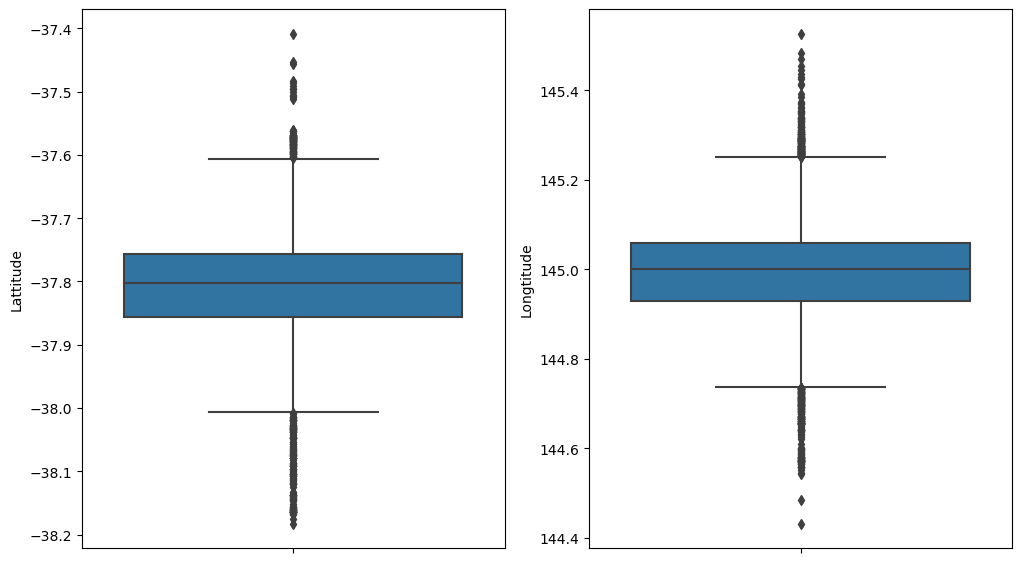

In [72]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y='Lattitude', data=df)

plt.subplot(1, 2, 2)
sns.boxplot(y='Longtitude', data=df)
plt.show()

Notice that the distribution of both ```Lattitude``` and ```Longitude``` is quite narrow. 

A good way to estimate the 'spread of data' is to look at the difference between the mean and the median (lower the better), and the variation from 25th to 75th percentile (quite small in this case).

Thus, let's impute the missing values by the mean value of ```Lattitude``` and ```Longitude``` respectively.

In [73]:
#fill missing values for coumns Lattitude and Longitude with respective mean values using fillna() function
df.fillna({'Lattitude': df['Lattitude'].mean(), 'Longtitude': df['Longtitude'].mean()}, inplace=True)

In [75]:
# imputing Lattitude and Longitude by mean values
#df.loc[np.isnan(df['Lattitude']), ['Lattitude']] = df['Lattitude'].mean()
#df.loc[np.isnan(df['Longtitude']), ['Longtitude']] = df['Longtitude'].mean()

# now look into missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values()

Suburb           0.00
Longtitude       0.00
Lattitude        0.00
Landsize         0.00
Bedroom2         0.00
Postcode         0.00
Regionname       0.00
Distance         0.00
SellerG          0.00
Method           0.00
Price            0.00
Type             0.00
Rooms            0.00
Address          0.00
Date             0.00
Propertycount    0.00
Bathroom         0.01
Car              0.46
dtype: float64

We now have ```Bathroom``` and ```Car``` with 0.01% and 0.46% NaNs respectively. 

Since these are very small number of rows, it does not really matter whether you delete or impute. However, let's have a look at the distributions.

In [76]:
print(df.shape)

(13603, 18)


In [77]:
df.loc[:, ['Bathroom', 'Car']]

,Bathroom,Car
1,1.0,1.0
2,1.0,0.0
4,2.0,0.0
5,2.0,1.0
6,1.0,2.0
...,...,...
23537,2.0,2.0
23538,2.0,2.0
23539,2.0,4.0
23541,1.0,5.0


In [78]:
df.loc[:, ['Bathroom', 'Car']].describe()

,Bathroom,Car
count,13602.000000,13540.000000
mean,1.534921,1.610414
std,0.691834,0.962244
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,8.000000,10.000000


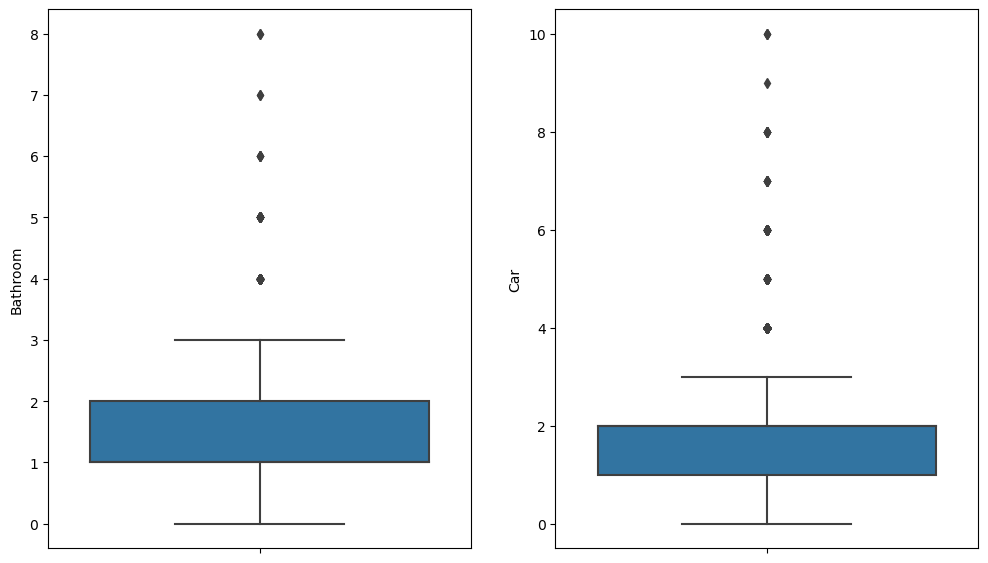

In [79]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y='Bathroom', data=df)

plt.subplot(1, 2, 2)
sns.boxplot(y='Car', data=df)
plt.show()

These two are integer type variables, and thus have values 0, 1, 2 etc. You cannot impute the NaNs by the mean or the median (1.53 bathrooms does not make sense!).

Thus, you need to impute them by the mode - the most common occurring value.



In [80]:
# converting to type 'category'
df['Car'] = df['Car'].astype('category')

# displaying frequencies of each category
df['Car'].value_counts()

2.0     5606
1.0     5515
0.0     1026
3.0      748
4.0      507
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

The most common value of ```Car``` is 2 (dtype is int), so let's impute the NaNs by that.

In [144]:
# imputing NaNs by 2.0
df.fillna({'Car': 2}, inplace=True)
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values()

Suburb           0.00
Longtitude       0.00
Lattitude        0.00
Landsize         0.00
Car              0.00
Bedroom2         0.00
Postcode         0.00
Regionname       0.00
Distance         0.00
SellerG          0.00
Method           0.00
Price            0.00
Type             0.00
Rooms            0.00
Address          0.00
Date             0.00
Propertycount    0.00
Bathroom         0.01
dtype: float64

In [81]:
# imputing NaNs by 2.0 other way
#df.loc[pd.isnull(df['Car']), ['Car']] = 2

Similarly for ```Bathroom```:

In [82]:
# converting to type 'category'
df['Bathroom'] = df['Bathroom'].astype('category')
# displaying frequencies of each category
df['Bathroom'].value_counts().sort_values(ascending=False)

1.0    7517
2.0    4987
3.0     921
4.0     106
0.0      34
5.0      28
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64

In [83]:
# imputing NaNs by 1
df.fillna({'Bathroom': 1}, inplace=True)
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values()

Suburb           0.00
Longtitude       0.00
Lattitude        0.00
Landsize         0.00
Bathroom         0.00
Bedroom2         0.00
Postcode         0.00
Regionname       0.00
Distance         0.00
SellerG          0.00
Method           0.00
Price            0.00
Type             0.00
Rooms            0.00
Address          0.00
Date             0.00
Propertycount    0.00
Car              0.46
dtype: float64

In [84]:
# imputing NaNs by 1
#df.loc[pd.isnull(df['Bathroom']), ['Bathroom']] = 1
#round(100*(df.isnull().sum()/len(df.index)), 2)

We now have a dataframe with no missing values. Let's finally look at how many rows (apart from three columns) we have lost in the process (originally we had 23547):

In [85]:
df.shape

(13603, 18)

In [88]:
# fraction of rows lost
(len(df.index)/23547)*100

57.769567248481756

Thus, we have lost about 42% observations in cleaning the missing values. 